In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [4]:
url = "C:/Users/ahadk/Downloads/archive (4)/Bank_Customer_Churn_Prediction.csv"
df = pd.read_csv(url)
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
print(df.isnull().sum())

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


In [6]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

In [7]:
df.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,1,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,1,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,1,27,2,134603.88,1,1,1,71725.73,0


In [8]:
unique_countries = df['country'].unique()
print("Unique Countries:", unique_countries)

Unique Countries: ['France' 'Spain' 'Germany']


In [9]:
df = pd.get_dummies(df, columns=['country'], prefix='country', drop_first=True)

In [10]:
df.head(10)

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
5,15574012,645,1,44,8,113755.78,2,1,0,149756.71,1,False,True
6,15592531,822,1,50,7,0.00,2,1,1,10062.80,0,False,False
7,15656148,376,0,29,4,115046.74,4,1,0,119346.88,1,True,False
8,15792365,501,1,44,4,142051.07,2,0,1,74940.50,0,False,False
9,15592389,684,1,27,2,134603.88,1,1,1,71725.73,0,False,False


In [11]:
df['country_Germany'] = df['country_Germany'].astype(int)
df['country_Spain'] = df['country_Spain'].astype(int)

In [12]:
df.head(10)

,customer_id,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
5,15574012,645,1,44,8,113755.78,2,1,0,149756.71,1,0,1
6,15592531,822,1,50,7,0.00,2,1,1,10062.80,0,0,0
7,15656148,376,0,29,4,115046.74,4,1,0,119346.88,1,1,0
8,15792365,501,1,44,4,142051.07,2,0,1,74940.50,0,0,0
9,15592389,684,1,27,2,134603.88,1,1,1,71725.73,0,0,0


In [16]:
X = df.drop(['customer_id', 'churn'], axis=1)
y = df['churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))



Epoch 1/10


250/250 [==============================] - 4s 4ms/step - loss: 0.4484 - accuracy: 0.8066 - val_loss: 0.3991 - val_accuracy: 0.8380
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3805 - accuracy: 0.8421 - val_loss: 0.3561 - val_accuracy: 0.8545
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8555 - val_loss: 0.3506 - val_accuracy: 0.8570
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8600 - val_loss: 0.3490 - val_accuracy: 0.8595
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3405 - accuracy: 0.8611 - val_loss: 0.3481 - val_accuracy: 0.8595
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8619 - val_loss: 0.3448 - val_accuracy: 0.8610
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 0.8609 - val_loss: 0.3439 - val_accuracy: 0.8560
Ep

In [21]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy*100:.2f}%")

63/63 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8585
Test Loss: 0.3437, Test Accuracy: 85.85%


In [22]:
from sklearn.metrics import classification_report
import numpy as np

In [23]:
y_pred = model.predict(X_test_scaled)
y_pred_binary = np.round(y_pred)

63/63 [==============================] - 0s 1ms/step


In [24]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1607
           1       0.71      0.48      0.57       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [25]:
print("\nPredictions vs Actual Labels:")
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_binary.flatten()})
print(result_df.head(10))


Predictions vs Actual Labels:
      Actual  Predicted
6252       0        0.0
4684       0        0.0
1731       0        0.0
4742       0        0.0
4521       0        0.0
6340       0        0.0
576        0        0.0
5202       1        0.0
6363       0        0.0
439        0        1.0


In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
conf_mat = confusion_matrix(y_test, y_pred_binary)

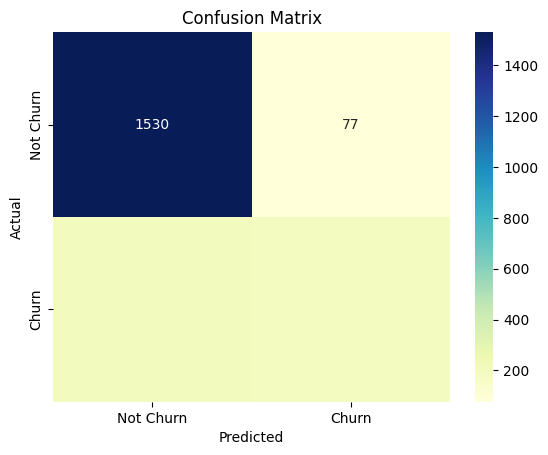

In [29]:
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()